# Kaplan-Meier Estimate

## Data

In [2]:
from lifelines.datasets import load_dd

data = load_dd()
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1808 entries, 0 to 1807
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ctryname           1808 non-null   object 
 1   cowcode2           1808 non-null   int64  
 2   politycode         1801 non-null   float64
 3   un_region_name     1808 non-null   object 
 4   un_continent_name  1808 non-null   object 
 5   ehead              1808 non-null   object 
 6   leaderspellreg     1808 non-null   object 
 7   democracy          1808 non-null   object 
 8   regime             1808 non-null   object 
 9   start_year         1808 non-null   int64  
 10  duration           1808 non-null   int64  
 11  observed           1808 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 169.6+ KB


In [4]:
print(data.shape)

(1808, 12)


In [29]:
data.to_csv("df.csv", encoding='utf-8', index=False)

# Kaplan-Meier Model

In [5]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [6]:
time = data["duration"]
event = data["observed"]

In [7]:
kmf.fit(time, event_observed=event)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1808 total observations, 340 right-censored observations>

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

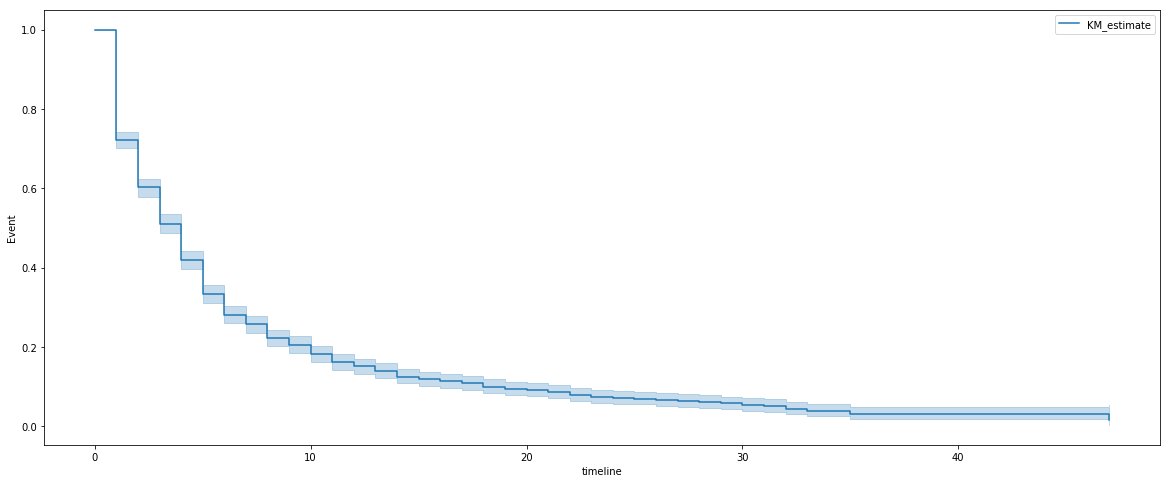

In [20]:
plt.figure(figsize= [20,8])
plt.ylabel("Event")
kmf.plot()

## Democratic and Non Democratic Regimes

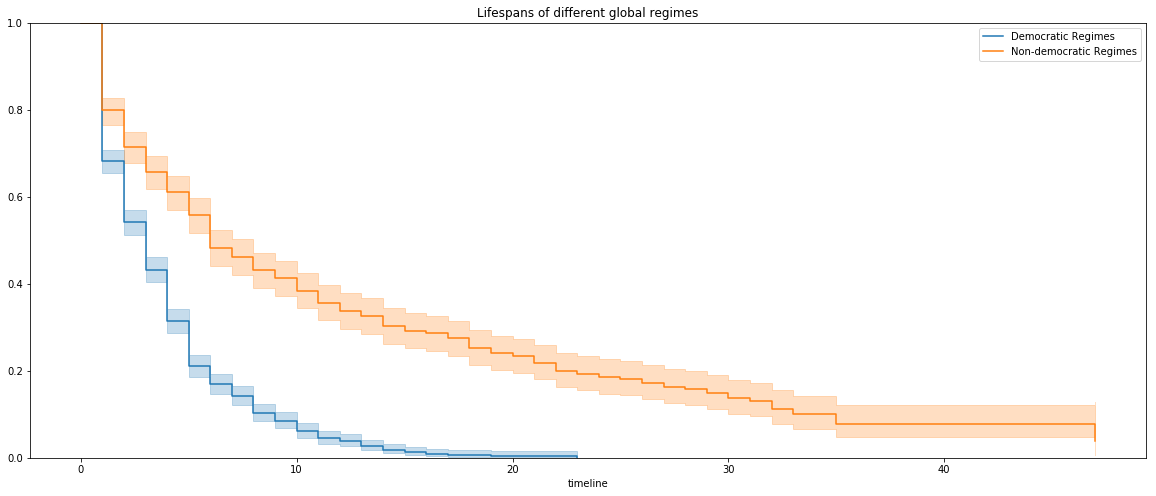

In [28]:
plt.figure(figsize= [20,8])
ax = plt.subplot(111)

dem = (data["democracy"] == "Democracy")

kmf.fit(time[dem], event_observed=event[dem], label="Democratic Regimes")
kmf.plot(ax=ax)

kmf.fit(time[~dem], event_observed=event[~dem], label="Non-democratic Regimes")
kmf.plot(ax=ax)

plt.ylim(0, 1);

plt.title("Lifespans of different global regimes");

## Country Comparision

In [31]:
data.un_continent_name.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [38]:
data[data["un_continent_name"] == 'America'].shape

(0, 12)

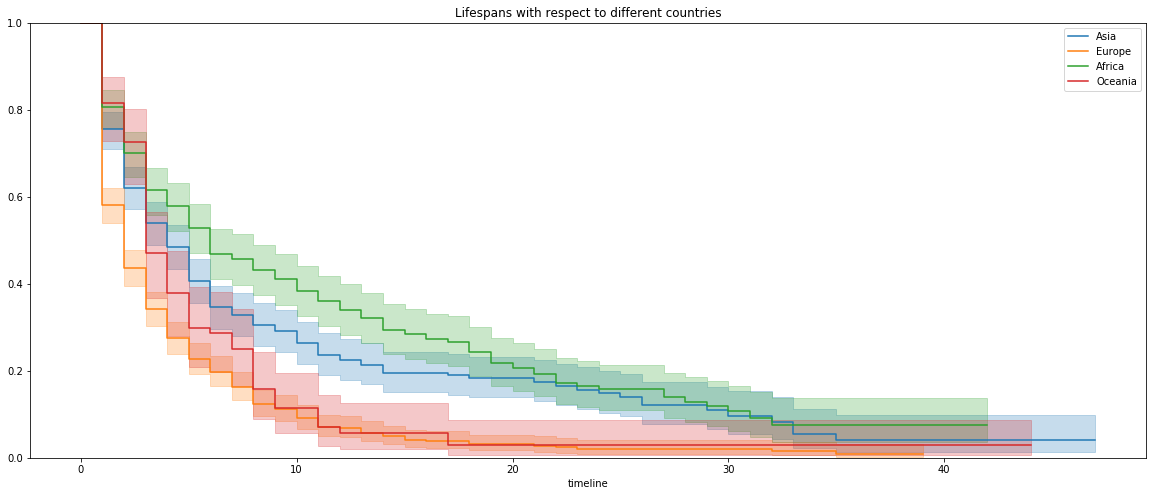

In [40]:
plt.figure(figsize= [20,8])
ax = plt.subplot(111)

cont_1 = (data["un_continent_name"] == "Asia")
cont_2 = (data["un_continent_name"] == "Europe")
cont_3 = (data["un_continent_name"] == "Africa")
cont_4 = (data["un_continent_name"] == "America")
cont_5 = (data["un_continent_name"] == "Oceania")

kmf.fit(time[cont_1], event_observed=event[cont_1], label="Asia")
kmf.plot(ax=ax)

kmf.fit(time[cont_2], event_observed=event[cont_2], label="Europe")
kmf.plot(ax=ax)

kmf.fit(time[cont_3], event_observed=event[cont_3], label="Africa")
kmf.plot(ax=ax)

#kmf.fit(time[cont_4], event_observed=event[cont_4], label="America")
#kmf.plot(ax=ax)

kmf.fit(time[cont_5], event_observed=event[cont_5], label="Oceania")
kmf.plot(ax=ax)

plt.ylim(0, 1);

plt.title("Lifespans with respect to different countries");

## Different Regimes

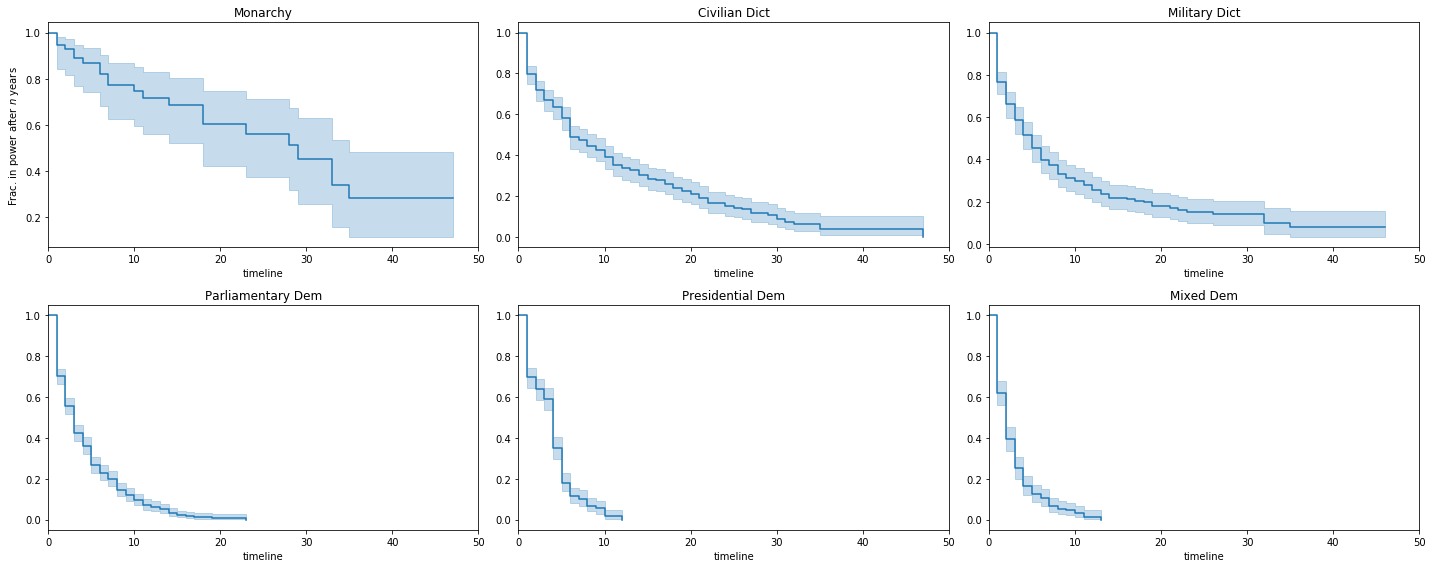

In [46]:
plt.figure(figsize= [20,8])
regime_types = data['regime'].unique()

for i, regime_type in enumerate(regime_types):
    ax = plt.subplot(2, 3, i + 1)

    ix = data['regime'] == regime_type
    kmf.fit(time[ix], event[ix], label=regime_type)
    kmf.plot(ax=ax, legend=False)

    plt.title(regime_type)
    plt.xlim(0, 50)

    if i==0:
        plt.ylabel('Frac. in power after $n$ years')

plt.tight_layout()

## Log Rank Test

In [43]:
from lifelines.statistics import logrank_test

results = logrank_test(time[dem], time[~dem], event[dem], event[~dem], alpha=.99)

results.print_summary()

# End